Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Read currentMVPRace.csv and pastMVPS.csv

In [2]:
currentMVPs = pd.read_csv('Data/currentMVPRace.csv')
pastMVPS = pd.read_csv('Data/pastMVPS.csv')

Split the data into a random train and test set (80% => training data, 20% => testing data)

In [3]:
train, test = train_test_split(pastMVPS, test_size=0.2, random_state=5)

Xtrain = train[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytrain = train[['Share']]
Xtest = test[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytest = test[['Share']]

Perform Random Forest Regression to figure out feature importance

In [4]:
RFF = RandomForestRegressor(random_state = 100, criterion = 'mse')

In [5]:
RFF.fit(Xtrain, Ytrain.values.ravel())
prediction = RFF.predict(Xtest)
sorted = RFF.feature_importances_.argsort()

Plot feature importance

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

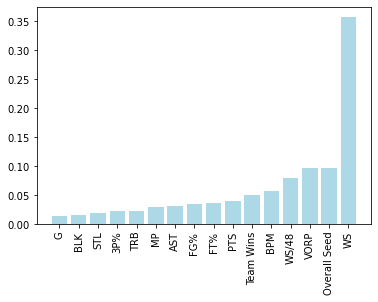

In [6]:
plt.bar(Xtrain.columns[sorted], RFF.feature_importances_[sorted], color='lightblue')
plt.xticks(rotation=90)

**Remove:**
- G => Weakest feature
- MP => Practically not important
- FT% => There have been many MVP winners with terrible FT%
- Team Wins => Overall Seed is a better feature
- BPM => VORP is a better feature
- WS/48 => WS is a better feature

Split the data into a random train and test set (80% => training data, 20% => testing data)

In [7]:
train, test = train_test_split(pastMVPS, test_size=0.2, random_state=5)

Xtrain = train[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP',]]
Ytrain = train[['Share']]
Xtest = test[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytest = test[['Share']]